In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import ast
from collections import Counter
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/assignment-1-nlp/sample_submission.csv
/kaggle/input/assignment-1-nlp/test_small.csv
/kaggle/input/assignment-1-nlp/train.csv


In [3]:
df1 = pd.read_csv('/kaggle/input/assignment-1-nlp/train.csv') # loading training data
data = []
for index, row in tqdm(df1.iterrows()):
    data.append(ast.literal_eval(row['tagged_sentence'])) # changing data-type of entries from 'str' to 'list'

47340it [00:12, 3839.04it/s]


In [4]:
df1.head()

,untagged_sentence,tagged_sentence
0,"['The', 'jury', 'further', 'said', 'in', 'term...","[('The', 'AT'), ('jury', 'NN'), ('further', 'R..."
1,"['The', 'September-October', 'term', 'jury', '...","[('The', 'AT'), ('September-October', 'NP'), (..."
2,"['``', 'Only', 'a', 'relative', 'handful', 'of...","[('``', '``'), ('Only', 'RB'), ('a', 'AT'), ('..."
3,"['The', 'jury', 'said', 'it', 'did', 'find', '...","[('The', 'AT'), ('jury', 'NN'), ('said', 'VB')..."
4,"['It', 'recommended', 'that', 'Fulton', 'legis...","[('It', 'PP'), ('recommended', 'VB'), ('that',..."


In [5]:
data = [
    [(item[0].lower(), item[1]) for item in sentence]
    for sentence in data
]

# data = [
#     [('%' if '%' in item[0] else item[0], item[1]) for item in sentence]
#     for sentence in data
# ]

# data = [
#     [('$' if '$' in item[0] else item[0], item[1]) for item in sentence]
#     for sentence in data
# ]

# data = [
#     [('0' if item[0].isdigit() else item[0], item[1]) for item in sentence]
#     for sentence in data
# ]

# data = [
#     [(lemmatizer.lemmatize(item[0]), item[1]) for item in sentence]
#     for sentence in data
# ]

In [6]:
df2 = pd.read_csv('/kaggle/input/assignment-1-nlp/test_small.csv') # loading test data
test_data = {} 
for index, row in tqdm(df2.iterrows()):
    test_data[row['id']] = ast.literal_eval(row['untagged_sentence']) # changing data-type of entries from 'str' to 'list'

4000it [00:00, 7314.46it/s]


In [7]:
df2.head()

,Unnamed: 0,id,untagged_sentence
0,3,3,"['For', 'you', 'have', 'been', 'reborn', ',', ..."
1,4,4,"['Man', 'had', 'enough', 'to', 'worry', 'about..."
2,6,6,"['He', 'trudged', 'on', ',', 'his', 'aching', ..."
3,12,12,"['``', 'But', 'I', 'believe', 'if', 'people', ..."
4,15,15,"['then', ',', 'to', 'better', 'purpose', ',', ..."


In [8]:
# test_data = {sent_id: [word.lower() for word in sent] for sent_id, sent in test_data.items()}
# test_data = {sent_id: ['%' if '%' in word else word for word in sent] for sent_id, sent in test_data.items()}
# test_data = {sent_id: ['$' if '$' in word else word for word in sent] for sent_id, sent in test_data.items()}
# test_data = {sent_id: ['0' if word.isdigit() else word for word in sent] for sent_id, sent in test_data.items()}
# test_data = {sent_id: [lemmatizer.lemmatize(word) for word in sent] for sent_id, sent in test_data.items()}

In [9]:
def display_data(sentence_index):
    '''
        Input : 'sentence_index' (int) -> index of a sentence in training data
        Output: None
    '''
    sentence = data[sentence_index]
    print("TOKEN -> TAG")
    print('...')
    for token, tag in sentence:
        print(token, '>', tag)
sentence_index = random.choice(range(len(data)))
display_data(sentence_index)

TOKEN -> TAG
...
j. > NP
l. > NP
hudson > NP
, > ,
detroit > NP
; > .
; > .


In [10]:
# cell to show the frequency of each distinct (slack or native) present in the training data

distinct_tags = []
words_tags = []
def store_tags():
    
    global distinct_tags
    global words_tags
    
    for sent in data:
#         words_tags.append(('START','START'))
        for word, tag in sent:
            words_tags.extend([(tag, word)])
#         words_tags.append(('END','END'))
    
store_tags()

tags=[]
words=[]
for tag, word in words_tags:
    tags.append(tag)
    words.append(word)

In [11]:
distinct_tags=list(set(tags))
distinct_tags=sorted(distinct_tags)

count_tags = {}
for tag, count in Counter(tags).items():
    count_tags[tag] = count

In [12]:
# most_prob_tag = max(count_tags, key=count_tags.get)
# most_prob_tag

# most_prob_tag_index = distinct_tags.index(most_prob_tag)
# most_prob_tag_index

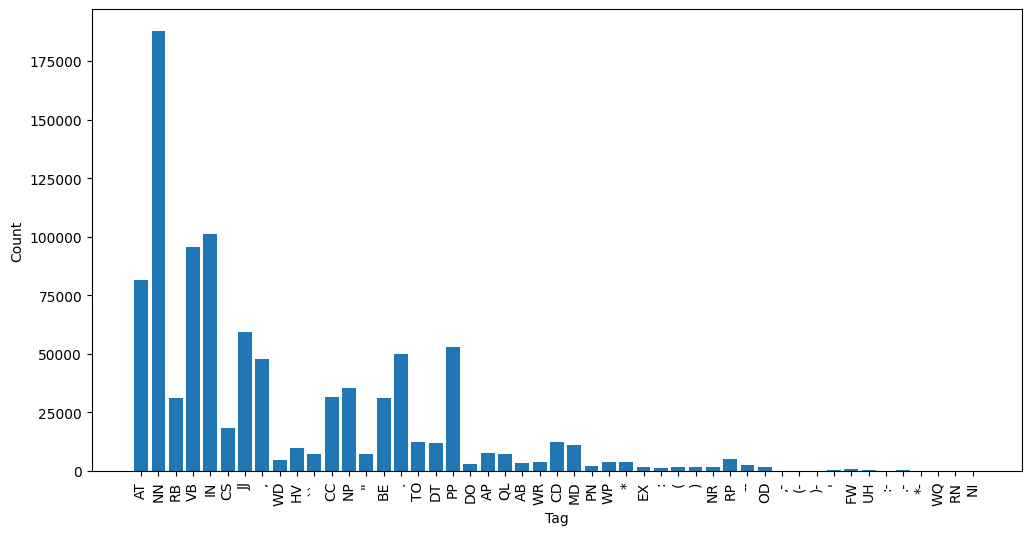

In [13]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation='vertical')
plt.bar(range(len(count_tags)), list(count_tags.values()), align='center')
plt.xticks(range(len(count_tags)), list(count_tags.keys()))
plt.xlabel('Tag')
plt.ylabel('Count')
plt.show()

In [14]:
distinct_words=list(set(words))
# distinct_words.append('OOV')
distinct_words=sorted(distinct_words)

count_words = {}
for word, count in Counter(words).items():
    count_words[word] = count

In [15]:
count_words = dict(sorted(count_words.items(), key=lambda item: item[1]))
# count_words

In [16]:
submission = {'id': [], 'tagged_sentence' : []} # dictionary to store tag predictions
# NOTE ---> ensure that tagged_sentence's corresponing 'id' is same as 'id' of corresponding 'untagged_sentence' in training data
def store_submission(sent_id, tagged_sentence):
    
    global submission
    submission['id'].append(sent_id)
    submission['tagged_sentence'].append(tagged_sentence)
    
def clear_submission():
    global submission
    submission = {'id': [], 'tagged_sentence' : []}

In [17]:
distinct_tags = np.array(distinct_tags)
distinct_words = np.array(distinct_words)

In [18]:
# end_tag_prob = np.zeros(len(distinct_tags))
# # end_tag_prob = np.ones(len(distinct_tags))

# for sentence in data:
#     tag = sentence[-1][1]
#     tag_index = np.where(distinct_tags == tag)[0][0]
#     end_tag_prob[tag_index] += 1
    
# for i in range(len(pi)):
#     end_tag_prob[i] /= len(data)
    
# # end_tag_prob

In [19]:
# C = np.zeros((len(distinct_tags),len(distinct_tags),len(distinct_words)))
# D = np.zeros((len(distinct_tags),len(distinct_words)))*len(distinct_tags)

C = np.ones((len(distinct_tags),len(distinct_tags),len(distinct_words)))
D = np.ones((len(distinct_tags),len(distinct_words)))*len(distinct_tags)

for sentence_no, sentence in enumerate(tqdm(data)):
    for i in range(len(sentence) - 1):
        tag1 = sentence[i][1]
        tag1_index = np.where(distinct_tags == tag1)[0][0]
        tag2 = sentence[i + 1][1]
        tag2_index = np.where(distinct_tags == tag2)[0][0]
        word2 = sentence[i + 1][0]
        word2_index = np.where(distinct_words == word2)[0][0]
        C[tag1_index][tag2_index][word2_index] += 1
        D[tag1_index][word2_index] += 1

100%|██████████| 47340/47340 [03:38<00:00, 216.60it/s]


In [20]:
for i in range(len(distinct_tags)):
    for j in range(len(distinct_tags)):
        for k in range(len(distinct_words)):
            C[i][j][k] /= D[i][k]

In [21]:
del D

In [22]:
# C0 = np.zeros((len(distinct_words),len(distinct_tags)))
C0 = np.ones((len(distinct_words),len(distinct_tags)))

for sentence_no, sentence in enumerate(tqdm(data)):
    tag = sentence[0][1]
    tag_index = np.where(distinct_tags == tag)[0][0]
    word = sentence[0][0]
    word_index = np.where(distinct_words == word)[0][0]
    C0[word_index][tag_index] += 1

for i in range(len(C0)):
    row_sum = sum(C0[i])
    for j in range(len(C0[i])):
        C0[i][j] /= row_sum
        
# C0

100%|██████████| 47340/47340 [00:11<00:00, 4168.53it/s]


In [23]:
def memm_tagger_util(sent_id, untagged_sentence):

    viterbi = np.zeros((len(distinct_tags),len(untagged_sentence)))
    backpointer = np.zeros((len(distinct_tags),len(untagged_sentence)))
    bestpath = np.zeros(len(untagged_sentence)).astype(int)
    
    temp = np.zeros(len(distinct_tags))
    
    unknown_words = [(i, word) for i, word in enumerate(untagged_sentence) if word.lower() not in distinct_words]

    if len(unknown_words) == 0:

        start_word = untagged_sentence[0].lower()
        start_word_index = np.where(distinct_words == start_word)[0][0]
        for s in range(len(distinct_tags)):
            viterbi[s][0] = C0[start_word_index][s]
            backpointer[s][0] = 0
    
        for t in range(1, len(untagged_sentence)):
            word = untagged_sentence[t].lower()
            word_index = np.where(distinct_words == word)[0][0]
            for s in range(len(distinct_tags)):
                for s_prime in range(len(distinct_tags)):
                    temp[s_prime] = viterbi[s_prime][t-1]*C[s_prime][s][word_index]
                viterbi[s][t], backpointer[s][t] = max((value, index) for index, value in enumerate(temp))
    
    else:
        
        unknown_words_indices = [item[0] for item in unknown_words]
        
        if 0 not in unknown_words_indices:
            start_word = untagged_sentence[0].lower()
            start_word_index = np.where(distinct_words == start_word)[0][0]
            for s in range(len(distinct_tags)):
                viterbi[s][0] = C0[start_word_index][s]
                backpointer[s][0] = 0
        else:
            for s in range(len(distinct_tags)):
                viterbi[s][0] = 1
                backpointer[s][0] = 0
    
        for t in range(1, len(untagged_sentence)):
            if t not in unknown_words_indices:
                word = untagged_sentence[t].lower()
                word_index = np.where(distinct_words == word)[0][0]
                for s in range(len(distinct_tags)):
                    for s_prime in range(len(distinct_tags)):
                        temp[s_prime] = viterbi[s_prime][t-1]*C[s_prime][s][word_index]
                    viterbi[s][t], backpointer[s][t] = max((value, index) for index, value in enumerate(temp))
            else:
                for s in range(len(distinct_tags)):
                    for s_prime in range(len(distinct_tags)):
                        temp[s_prime] = viterbi[s_prime][t-1]
                    viterbi[s][t], backpointer[s][t] = max((value, index) for index, value in enumerate(temp))
            
    bestpathprob, bestpathpointer = max((value, index) for index, value in enumerate([row[-1] for row in viterbi]))
    backpointer = backpointer.astype(int)
    
    row = bestpathpointer
    column = len(untagged_sentence) - 1
    while column >= 0:
        bestpath[column] = row
        row = backpointer[row][column]
        column -= 1
    
    tagged_sentence = []    
    
    for i in range(len(untagged_sentence)):
        tagged_sentence.append((untagged_sentence[i], distinct_tags[bestpath[i]]))    
    
    store_submission(sent_id, tagged_sentence)

In [24]:
clear_submission()

for sent_id in tqdm(list(test_data.keys())):
    sent = test_data[sent_id]
#     print(test_data[sent_id])
    memm_tagger_util(sent_id, sent)

100%|██████████| 4000/4000 [07:31<00:00,  8.86it/s]


In [25]:
path_to_directory = '/kaggle/working/'
pd.DataFrame(submission).to_csv(path_to_directory +'submission.csv', index = False)